# Min Max Scaler

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

In [3]:
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 1)

print(x_train.shape)
print(x_test.shape)

(426, 30)
(143, 30)


In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(x_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [7]:
# 학습 데이터 transform
x_train_scaled = scaler.transform(x_train)

print("변환된 후 크기: ", x_train_scaled.shape)
print("조정 전 특성별 최소값: ", x_train.min(axis = 0))
print("조정 전 특성별 최대값: ", x_train.max(axis = 0))
print("조정 후 특성별 최소값: ", x_train_scaled.min(axis = 0))
print("조정 후 특성별 최대값: ", x_train_scaled.max(axis = 0))

변환된 후 크기:  (426, 30)
조정 전 특성별 최소값:  [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
조정 전 특성별 최대값:  [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
조정 후 특성별 최소값:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
조정 후 특성별 최대값:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [8]:
x_test_scaled = scaler.transform(x_test)

print("조정 후 특성별 최소값: ", x_test_scaled.min(axis = 0))
print("조정 후 특성별 최대값: ", x_test_scaled.max(axis = 0))

조정 후 특성별 최소값:  [ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
조정 후 특성별 최대값:  [0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


# Quantile Transform

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import QuantileTransformer, StandardScaler, PowerTransformer

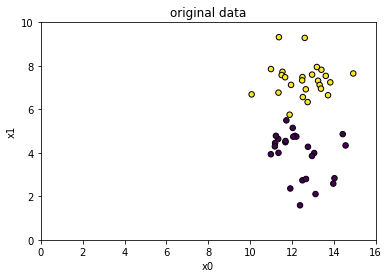

In [12]:
x, y = make_blobs(n_samples = 50, centers = 2, random_state = 4, cluster_std = 1)
x += 3

plt.scatter(x[:, 0], x[:, 1], c = y, s = 30, edgecolors = 'black')
plt.xlim(0, 16)
plt.xlabel('x0')
plt.ylim(0, 10)
plt.ylabel('x1')
plt.title("original data")
plt.show()

/Users/jonghyunlee/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:2239: UserWarning: n_quantiles (1000) is greater than the total number of samples (50). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


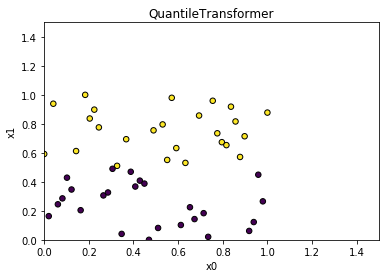

In [15]:
scaler = QuantileTransformer()
x_trans = scaler.fit_transform(x)

plt.scatter(x_trans[:, 0], x_trans[:, 1], c = y, s = 30, edgecolors = 'black')
plt.xlim(0, 1.5)
plt.xlabel('x0')
plt.ylim(0, 1.5)
plt.ylabel('x1')
plt.title(type(scaler).__name__)
plt.show()

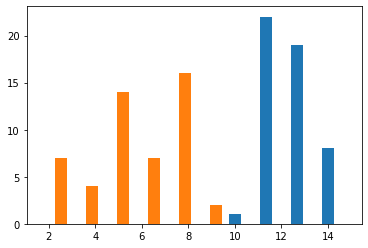

In [17]:
plt.hist(x)
plt.show()

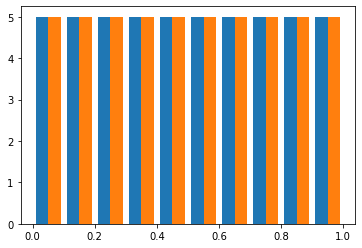

In [16]:
plt.hist(x_trans)
plt.show()

/Users/jonghyunlee/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:2239: UserWarning: n_quantiles (1000) is greater than the total number of samples (50). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


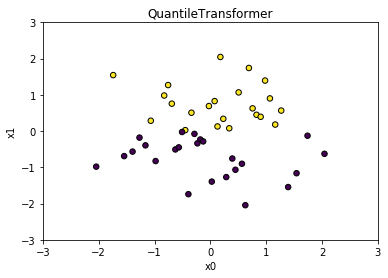

In [19]:
# 정규 분포 옵션
scaler = QuantileTransformer(output_distribution = 'normal')
x_trans = scaler.fit_transform(x)

plt.scatter(x_trans[:, 0], x_trans[:, 1], c = y, s = 30, edgecolors = 'black')
plt.xlim(-3, 3)
plt.xlabel('x0')
plt.ylim(-3, 3)
plt.ylabel('x1')
plt.title(type(scaler).__name__)
plt.show()

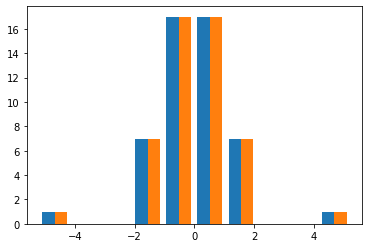

In [20]:
plt.hist(x_trans)
plt.show()

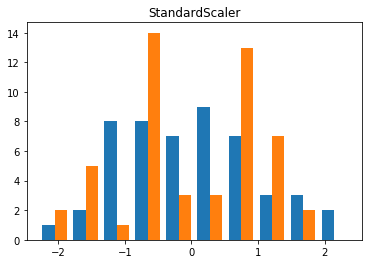

In [21]:
x_trans = StandardScaler().fit_transform(x)
plt.hist(x_trans)
plt.title('StandardScaler')
plt.show()